# Project Business Statistics: E-news Express


## Define Problem Statement and Objectives

As the executives of E-News Express believe that there is a decrease in the number of new subscribers compared to last year, the design team has researched and created a new layout for the website, hoping that this new design boosts the number of subscribers.

The company now wants to know if this design will be effective in increasing the number of subscribers. For this, a sample of 100 users was selected and divided into two groups. The control group consists of 50 users using the current website, and the treatment group consists of 50 users using the new design.

Based on this sample, we need to draw conclusions regarding the effectiveness of the new design and answer the following questions:

1) Do the users spend more time on the new landing page than on the existing landing page?

2) Is the conversion rate (the proportion of users who visit the landing page and get converted) for the new page greater than the conversion rate for the old page?

3) Does the converted status depend on the preferred language?

4) Is the time spent on the new page the same for the different language users?

The objective of this analysis is to provide insights from the collected data, answer the proposed questions, and finally provide some conclusions and recommendations.

## Import all the necessary libraries

In [5]:
# Installing the libraries with the specified version.
#!pip install numpy==1.25.2 pandas==1.5.3 matplotlib==3.7.1 seaborn==0.13.1 scipy==1.11.4 -q --user

**Note**: *After running the above cell, kindly restart the notebook kernel and run all cells sequentially from the start again.*

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib 
import matplotlib.pyplot as plt 
import seaborn as sns 
import scipy

print("Numpy version:", np.__version__)
print("Pandas version:", pd.__version__)
print("Matplotlib version:", matplotlib.__version__)
print("Seaborn version:", sns.__version__)
print("Scipy version:", scipy.__version__)

Numpy version: 1.26.4
Pandas version: 2.2.2
Matplotlib version: 3.10.0
Seaborn version: 0.13.2
Scipy version: 1.13.1


## Reading the Data into a DataFrame

In [2]:
#Read and copy data in a variable called df
data = pd.read_csv('abtest.csv')
df =data.copy()

## Explore the dataset and extract insights using Exploratory Data Analysis

- Data Overview
  - Viewing the first and last few rows of the dataset
  - Checking the shape of the dataset
  - Getting the statistical summary for the variables
- Check for missing values
- Check for duplicates

In [3]:
# We proceed to check our data for general information, missing data, and basic statistics. 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   user_id                 100 non-null    int64  
 1   group                   100 non-null    object 
 2   landing_page            100 non-null    object 
 3   time_spent_on_the_page  100 non-null    float64
 4   converted               100 non-null    object 
 5   language_preferred      100 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 4.8+ KB


As expected we have 100 entries in our table.

In [4]:
df.shape

(100, 6)

We have 100 rows and 7 columns in our data set.

In [5]:
df.head()

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
0,546592,control,old,3.48,no,Spanish
1,546468,treatment,new,7.13,yes,English
2,546462,treatment,new,4.40,no,Spanish
3,546567,control,old,3.02,no,French
4,546459,treatment,new,4.75,yes,Spanish


In [6]:
df.tail()

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
95,546446,treatment,new,5.15,no,Spanish
96,546544,control,old,6.52,yes,English
97,546472,treatment,new,7.07,yes,Spanish
98,546481,treatment,new,6.20,yes,Spanish
99,546483,treatment,new,5.86,yes,English


The tested users are numerated from 0 to 99. The 7 columns we have in our dataframe correspond to what we expected.

In [7]:
df.isnull().sum()

user_id                   0
group                     0
landing_page              0
time_spent_on_the_page    0
converted                 0
language_preferred        0
dtype: int64

In [8]:
df.isna().sum()

user_id                   0
group                     0
landing_page              0
time_spent_on_the_page    0
converted                 0
language_preferred        0
dtype: int64

Our data is free of null data. 

In [9]:
df.describe(include='all')

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
count,100.000000,100,100,100.000000,100,100
unique,NaN,2,2,NaN,2,3
top,NaN,control,old,NaN,yes,Spanish
freq,NaN,50,50,NaN,54,34
mean,546517.000000,NaN,NaN,5.377800,NaN,NaN
std,52.295779,NaN,NaN,2.378166,NaN,NaN
min,546443.000000,NaN,NaN,0.190000,NaN,NaN
25%,546467.750000,NaN,NaN,3.880000,NaN,NaN
50%,546492.500000,NaN,NaN,5.415000,NaN,NaN
75%,546567.250000,NaN,NaN,7.022500,NaN,NaN


We have two columns that seems to be the same (group and landing page). 
The minimum time spend in the website was only 2.3 minutes while the maximum was 10.7 minutes with a mean of 5.3 minutes. 
The majority of users in our sample used Spanish as their preffered language (34 out of 100).

In [10]:
df.nunique()

user_id                   100
group                       2
landing_page                2
time_spent_on_the_page     94
converted                   2
language_preferred          3
dtype: int64

There is no duplicated data (100 unique users)

In [11]:
#checking data sanity confirming that group and landing page values correspond (treatment = new, control = old)
df['match'] = ((df['group'] == 'treatment') & (df['landing_page'] == 'new')) | ((df['group'] == 'control') & (df['landing_page'] == 'old'))
df['match'].value_counts()

match
True    100
Name: count, dtype: int64

We confirmed that the control and the landing page columns represent the same data.

### Univariate Analysis

group
control      50
treatment    50
Name: count, dtype: int64

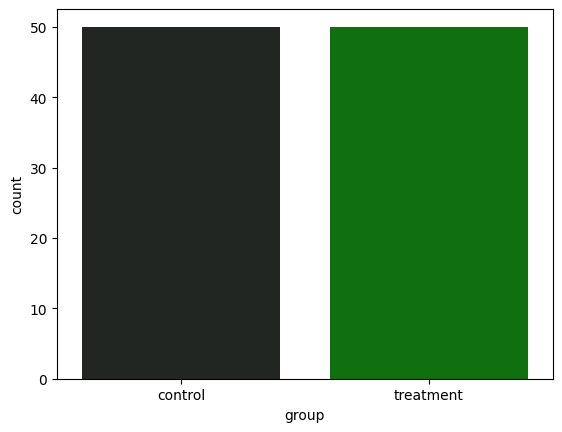

In [12]:
sns.countplot(data=df, x='group',hue='group', palette='dark:Green')
df['group'].value_counts()

landing_page
old    50
new    50
Name: count, dtype: int64

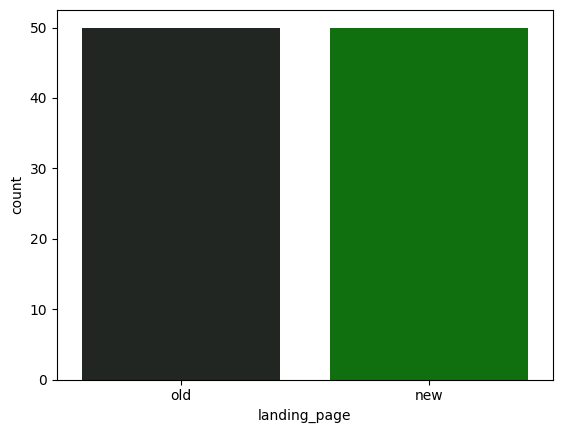

In [13]:
sns.countplot(data=df, x='landing_page', hue='landing_page',palette='dark:Green')
df['landing_page'].value_counts()

As expected (and confirmed with initial data sanity check) data is divided in 2 groups of 50 participants each (50 for new website=treatment group and 50 old website = control). So from now on, only one of the columns will be analyzed as they have the same information.

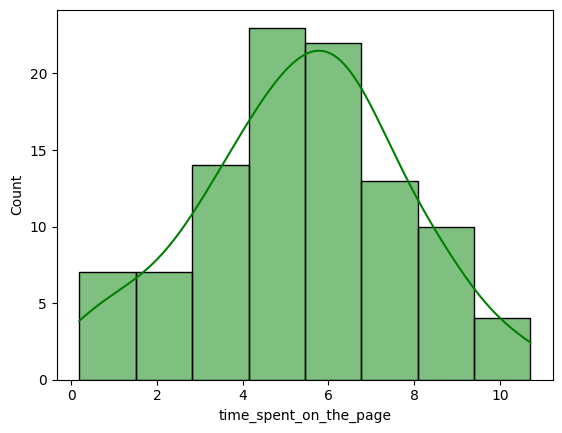

In [14]:
sns.histplot(data=df, x='time_spent_on_the_page',kde='true', color='Green');

As first sight, the time spend on the website for all the user seems to follow almost a normal distribution. More analysis might be needed.

converted
yes    54
no     46
Name: count, dtype: int64

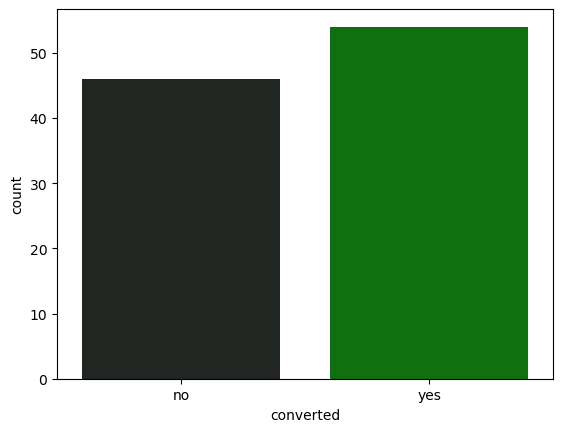

In [34]:
sns.countplot(data=df, x='converted',hue='converted', palette='dark:Green')
df['converted'].value_counts()

From the data we can see that more user were converted than the ones that were not converted. Further analysis is needed to check if the design of the landing page had something to do with it or not.

language_preferred
Spanish    34
French     34
English    32
Name: count, dtype: int64

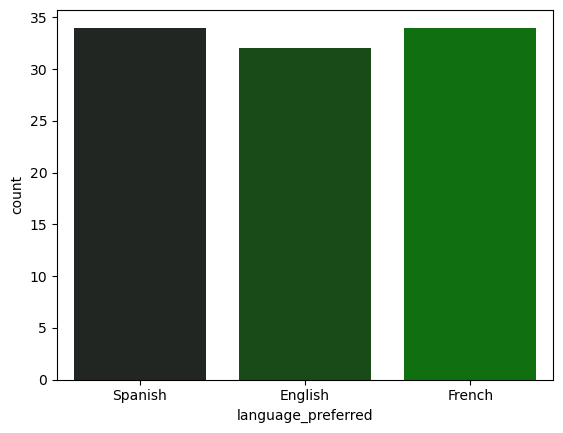

In [36]:
sns.countplot(data=df, x='language_preferred',hue='language_preferred', palette='dark:Green');
df['language_preferred'].value_counts()

We can see from the data that almost 1/3 of the users used Spanish, English and French respectively as their chosen landing page language. English users counts for 32 users while Spanish and French counts for 34 each.

### Bivariate Analysis

### Landing Page

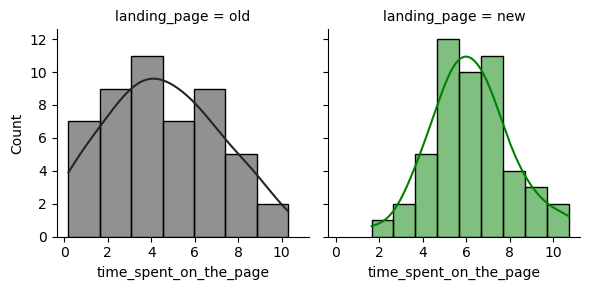

In [40]:
g = sns.FacetGrid(df, col='landing_page', sharex=True, sharey=True,hue='landing_page',palette='dark:Green') 
# Map the histplot to the grid 
g.map(sns.histplot, 'time_spent_on_the_page', kde=True);

When separating what type of group we are analyzing, we realize that the distribution of the time spend by user is modified. 

group
control      4.5324
treatment    6.2232
Name: time_spent_on_the_page, dtype: float64


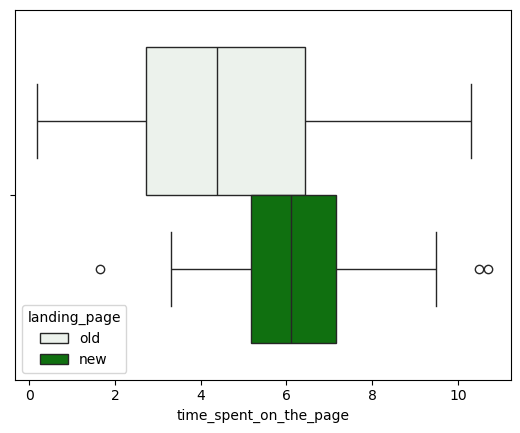

In [42]:
sns.boxplot(data=df, x='time_spent_on_the_page', hue='landing_page',palette='light:Green');
print(df.groupby('group')['time_spent_on_the_page'].mean())

We can see that in average users spent more time on the new website. We need further analysis to test if this finding is statistically relevant or not

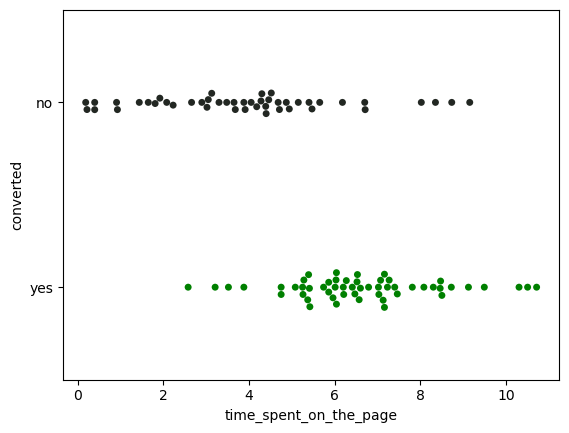

In [44]:
sns.swarmplot(data=df, x='time_spent_on_the_page', y='converted',hue='converted', palette='dark:Green');

It seems that the users who spend more time on the website are converted, while users who are not converted tend to spend less time on the website

### Time Spend On the Page

language_preferred
English    5.559062
French     5.253235
Spanish    5.331765
Name: time_spent_on_the_page, dtype: float64


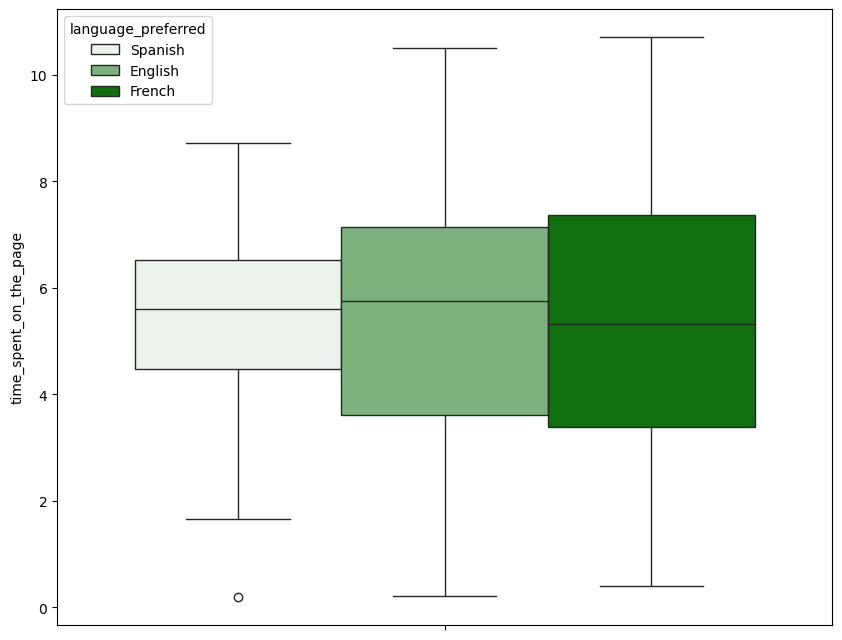

In [47]:
plt.figure(figsize=(10,8))
sns.boxplot(data=df, y='time_spent_on_the_page', hue='language_preferred',palette='light:Green');
print(df.groupby('language_preferred')['time_spent_on_the_page'].mean())

We can see that in average users stays in the website for almost the same amount of time independent of their selected language. But this still needs to be tested.

landing_page  converted
new           yes          33
              no           17
old           no           29
              yes          21
Name: count, dtype: int64


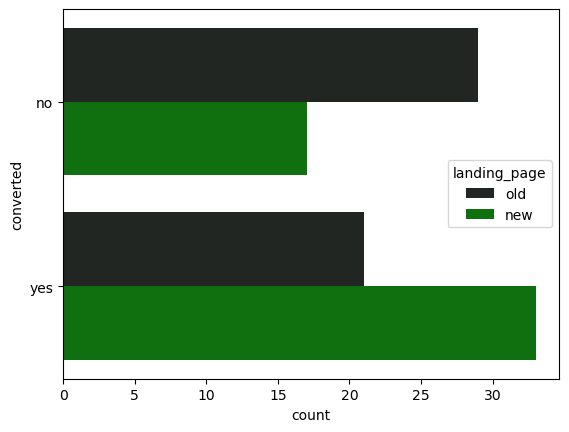

In [49]:
sns.countplot(data=df, y='converted', hue='landing_page',palette='dark:Green');
print(df.groupby('landing_page')['converted'].value_counts())

We can see that more users were converted when using the new website design. This information might need to be analyzed in more detail to tell if the change is statistically relevant or not.

## 1. Do the users spend more time on the new landing page than the existing landing page?

### Perform Visual Analysis

landing_page
new    6.2232
old    4.5324
Name: time_spent_on_the_page, dtype: float64


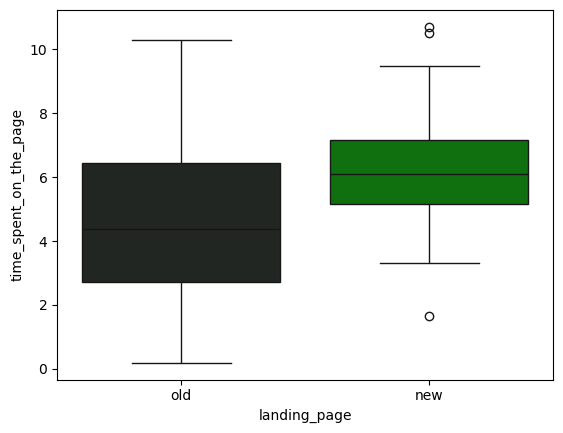

In [53]:
sns.boxplot(data=df, y='time_spent_on_the_page', x='landing_page', hue='landing_page',palette='dark:Green');
print(df.groupby('landing_page')['time_spent_on_the_page'].mean())

As seen in the graph, it seems that users spend more time in average on the new site. But we still need to prove that the difference is statistically relevant.

### Step 1: Define the null and alternate hypotheses

$H_0$: Users spend the same time on the website independent of the landing site design

$H_a$: User spend more time on the new landing site design

### Step 2: Select Appropriate test

As we're trying to prove if the mean of minutes spent by user in the new website is bigger than the old website, this is a one-tailed analysis ('greater than'). The variance of the population is unknown and the samples are independent, so the appropiate test for this analysis is the two-sample independent t-test. 

### Step 3: Decide the significance level

As defined in the description, the level of significance f this test is 5% (alfa = 0.05)

### Step 4: Collect and prepare data

In [62]:
# We need to separate the data into two groups. One for the new design and one for the old design.
df_old = df[df['landing_page'] == 'old']['time_spent_on_the_page'].copy()
df_new = df[df['landing_page'] == 'new']['time_spent_on_the_page'].copy()

In [63]:
# We need to calculate standard deviation for each group now.
old_sd = round(df_old.std(),2)
new_sd = round(df_new.std(),2)
print('Old sd is ', old_sd,'. The new sd is ',new_sd)

Old sd is  2.58 . The new sd is  1.82


From these results we can say that the standard deviation of both groups are not equal. 

### Step 5: Calculate the p-value

In [66]:
#importing the required library
from scipy.stats import ttest_ind
test_stat, p_value = ttest_ind(df_new, df_old, equal_var = False, alternative = 'greater')
print('The p-value is ' + str(p_value))

The p-value is 0.00013923812251665497


### Step 6: Compare the p-value with $\alpha$

In [68]:
#check p-value versus alfa
if p_value < 0.05:
    print('We have enough statistical evidence to reject the Null hypothesis. We reject the Null hypothesis/Accept the Alternative hypothesis')
else:
    print("We don't have enough statistical evidence to reject the Null hypothesis. We accept the Null Hypothesis")

We have enough statistical evidence to reject the Null hypothesis. We reject the Null hypothesis/Accept the Alternative hypothesis


### Step 7:  Draw inference

The calculated p-value sugests that we have enough evidence to reject the null hypothesis and accept the alternative one as true. So there is enough evidence to assume that users spent more time on the new design of the website. 

## 2. Is the conversion rate (the proportion of users who visit the landing page and get converted) for the new page greater than the conversion rate for the old page?

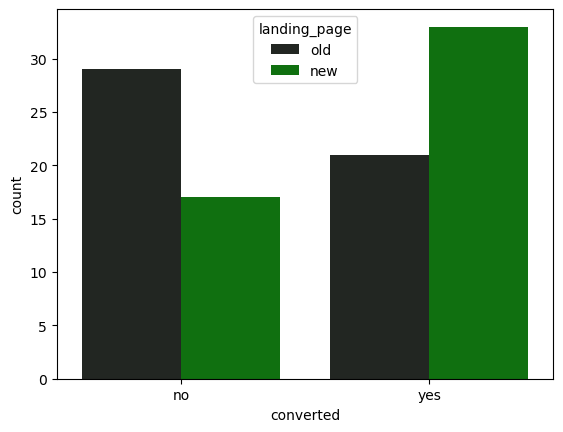

In [72]:
#Visual  Analysis
sns.countplot(data=df, x='converted',hue='landing_page',palette='dark:Green');

At first sight it seems that the new website has a better convertion rate than the old design. Nevertheless, this needs to be proved.

### Defining the Null/alternative hyptohesis

As the convertion rate is a proportion of users who visit the landing page and get converted, the hypothesis needs to be formulated based on proportions (proportion of users using the new design converted = p1, and the proportion of users using the old design converted = p2). Then: 


$H_0$: p1 = p2

$H_a$: p1 > p2

### Chosen test and alpha
   
As we are dealing with proportions (convertion rates), the appropiate test to use is the two-sample proportion z-test. As stated in the problem the level of significance of this analysis is 5% (alpha = 0.05)

### Data collection

In [77]:
# We need to get both new and old design convertion rate
new_rate = df[(df['converted'] == 'yes') & (df['landing_page'] == 'new')].shape[0]
old_rate = df[(df['converted'] == 'yes') & (df['landing_page'] == 'old')].shape[0]
print(new_rate, old_rate)

33 21


In [78]:
# As we know, every group had 50 users
nobs=np.array([50,50])
# A list is used to store the rates 
rates=[new_rate,old_rate]

### p-value calculation

In [80]:
#calling function proportions_ztest for 2 samples proportion z_test
from statsmodels.stats.proportion import proportions_ztest
test_stat, p_value2 = proportions_ztest(rates,nobs,alternative='larger')
print(p_value2)

0.008026308204056278


### Compare p-value with alpha

In [82]:
if p_value2 < 0.05:
    print('We have enough statistical evidence to reject the Null hypothesis. We reject the Null hypothesis/Accept the Alternative hypothesis')
else:
    print("We don't have enough statistical evidence to reject the Null hypothesis. We accept the Null Hypothesis")

We have enough statistical evidence to reject the Null hypothesis. We reject the Null hypothesis/Accept the Alternative hypothesis


### Conclusions
As out p-value is less than ouralpha, we can reject the null hypothesis and accept the alternative hypothesis as true. This means that we have enough evidence to say that the convertion rate of user in the new website is higher than the convertion rate of the old design.

## 3. Is the conversion and preferred language are independent or related?

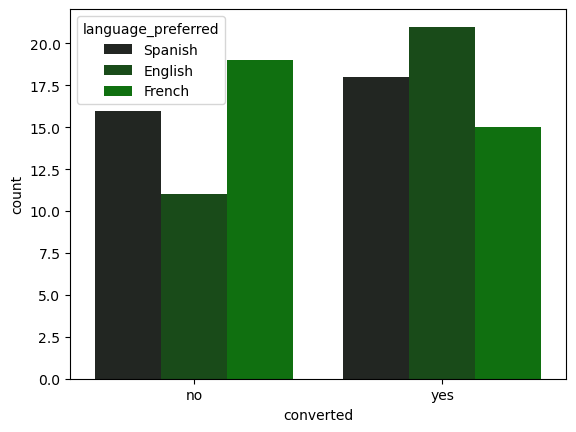

In [85]:
#Data visualization
sns.countplot(data=df, x='converted', hue='language_preferred', palette='dark:Green');

At first sight there is not a clear relation between the language used by the users and the convertion.

### Defining the Null/alternative hyptohesis
$H_0$: The convertion rate and the preferred language are independent

$H_a$: The convertion rate and the preferred language are dependent/related. 

### Chosen test and alpha
To check relation between two categorical variables we need to use a chi square test for independence. As stated originally the defined alpha for this test is 0.05 (5%)

### Data collection

In [90]:
# We need to get the data from the incumbent columns that are 'converted' and 'language_preferred'.
# For this purpose we create a contigency table that we can later plug-in into the chi-square test.
contigency_table = pd.crosstab(df['converted'], df['language_preferred'])
print(contigency_table)

language_preferred  English  French  Spanish
converted                                   
no                       11      19       16
yes                      21      15       18


### p-value calculation

In [92]:
from scipy.stats import chi2_contingency
chi2, p_value3, dof, expected = chi2_contingency(contigency_table)
print(p_value3)

0.21298887487543447


### Compare p-value with alpha

In [94]:
if p_value3 < 0.05:
    print('We have enough statistical evidence to reject the Null hypothesis. We reject the Null hypothesis/Accept the Alternative hypothesis')
else:
    print("We don't have enough statistical evidence to reject the Null hypothesis. We accept the Null Hypothesis")

We don't have enough statistical evidence to reject the Null hypothesis. We accept the Null Hypothesis


### Conclusions
As the p-value is higher than our defined alpha value, we don't have enough statistical evidence to reject the null hypothesis, that means that the idea that both variables are independent seems to be true with the available information. We can't conclude that the preferred language of the users has an incidende on their convertion.

## 4. Is the time spent on the new page same for the different language users?

### Data visualization

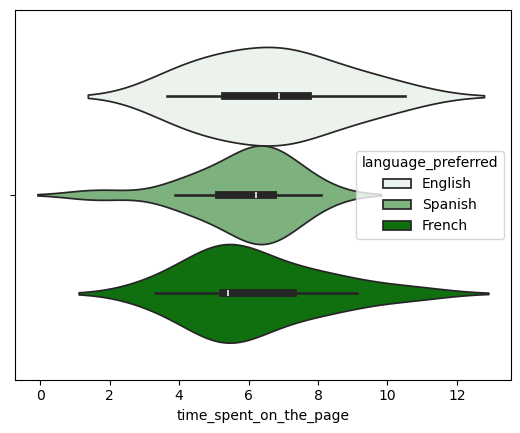

In [154]:
time_spent = df[df['group'] == 'treatment']
sns.violinplot(data=time_spent, x='time_spent_on_the_page', hue='language_preferred', palette='light:Green');

At first sight, it seems that there is a small difference in the mean time spent on the new website depending on the preferred language of the user.

### Defining the Null/alternative hyptohesis

Having three different languages each one with a different mean of time spent on the new site, we will define 3 different means each of them corresponding to an specific language. μs for Spanish, μe for English and μf for French

$H_0$:     μs = μe = μf

$H_a$:     μs &ne; μe &ne; uf (At least one of them is different)

### Defining test and alpha level
As we are comparing means of different groups (preferred language) and we want to test if one of the group's mean is different a suitable test is the ANOVA test. As stated before, the required alpha is 0.05 (5%)

### Collect and prepare data

In [103]:
# We need to separate each group of the new page by their languague. After that we can calculate means for each group.
# To achieve this we are going to use the recently created dataframe (time_spent) with the new design information only.

time_english = time_spent[time_spent['language_preferred'] == 'English']['time_spent_on_the_page']
time_spanish = time_spent[time_spent['language_preferred'] == 'Spanish']['time_spent_on_the_page']
time_french = time_spent[time_spent['language_preferred'] == 'French']['time_spent_on_the_page']

In [104]:
#Import required library
from scipy.stats import f_oneway
#calculate p-value
test_stat, p_value4 = f_oneway(time_english,time_spanish,time_french)
print(p_value4)

0.43204138694325955


In [105]:
if p_value4 < 0.05:
    print('We have enough statistical evidence to reject the Null hypothesis. We reject the Null hypothesis/Accept the Alternative hypothesis')
else:
    print("We don't have enough statistical evidence to reject the Null hypothesis. We accept the Null Hypothesis")

We don't have enough statistical evidence to reject the Null hypothesis. We accept the Null Hypothesis


### Conclusions

As the p-value is higher than out defined alpha we don't have enough evidence to reject the null hypothesis, meaning that even though at first sight there seems to be a difference between the time spent by users with different languages, this is not the case. We can then say that the mean time spent in the new design has no relation with the language used by the users.

## Conclusion and Business Recommendations

### Conclusions:

The new design causes users to spend more time on the website compared to the old design.

The conversion rate is higher on the new website design.

The conversion rate is not related to the user's preferred language.

The average time spent by users on the new website is not related to the user's preferred language.

### Recommendations:

Based on these conclusions, we recommend that the executive team proceed with the new design. This change is likely to increase the time users spend on the website and improve the conversion rate, potentially boosting revenue from user subscriptions. Additionally, we can assure that the users' preferred language does not influence the time spent on the website or the conversion rate, making this change effective for English, Spanish, and French users.

___